In [1]:
!pip install -q keras-ocr


     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 9.5MB 26.2MB/s 
     |████████████████████████████████| 849kB 49.8MB/s 
     |████████████████████████████████| 133kB 58.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 


In [2]:
import keras_ocr
import matplotlib.pyplot as plt

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [11]:
images = [
    keras_ocr.tools.read(img) for img in ['/content/sunsilk.jpg',
                                          '/content/sunsilk2.jpg',
                                          '/content/Sunsilk-Dream-Soft-Smooth-Shampoo-SDL449834326-1-488d5.jpg',
                                          '/content/Sunsilk-Stunning-Black-Shine-Shampoo-SDL430570238-1-f712c.jpg'
    ]
]

In [12]:
len(images)


4

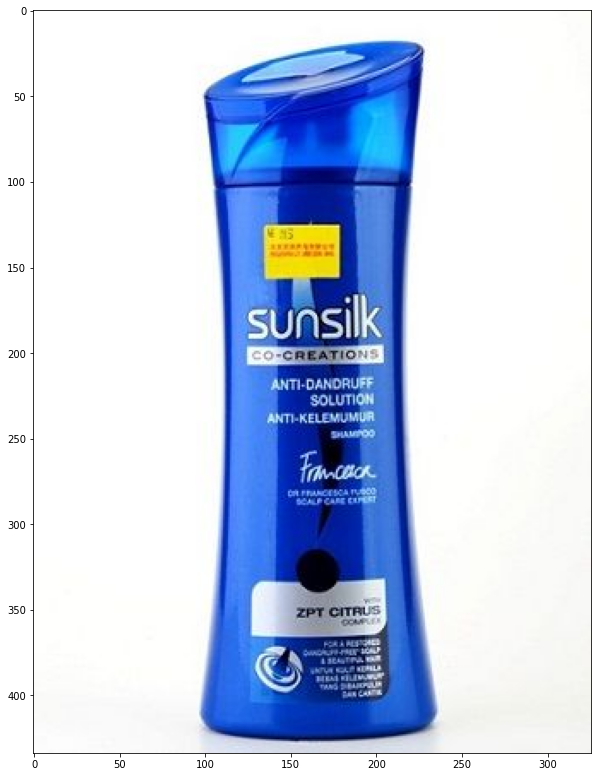

In [13]:

plt.figure(figsize = (10,20))
plt.imshow(images[0])

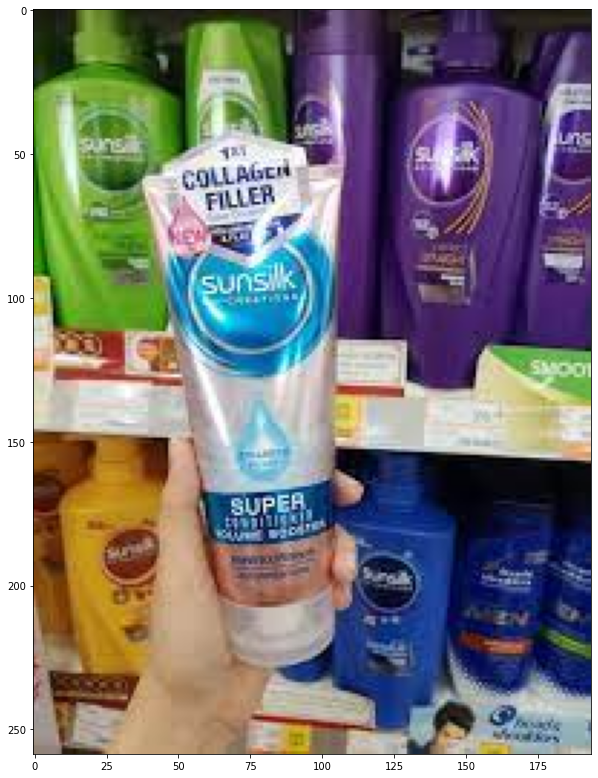

In [14]:
plt.figure(figsize = (10,20))
plt.imshow(images[1])

## Get Predictions

In [15]:
prediction_groups = pipeline.recognize(images)


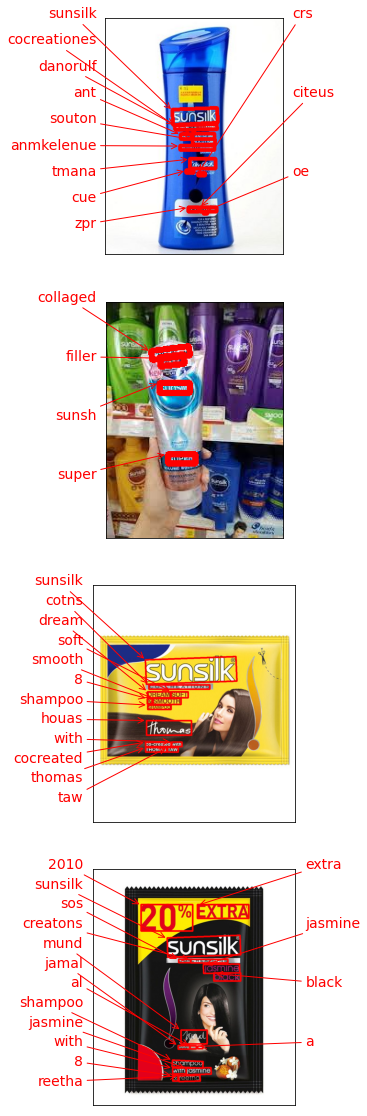

In [16]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

### Drawback 
### It is not supporting in jupyter notebook
### After execution, the results are not up to the mark
### Link- https://youtu.be/WtEhQvVUdH4